# Coding Test		Y-intercept		Xiaoyue Chen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS

In [2]:
csvFile = 'data.csv'
dframe = pd.DataFrame(pd.read_csv(csvFile))
dframe

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100
...,...,...,...,...
451108,9984 JT,2021-03-15,10370.0000,12041200
451109,9984 JT,2021-03-16,10620.0000,11346000
451110,9984 JT,2021-03-17,10400.0000,9771000
451111,9984 JT,2021-03-18,10220.0000,13941600


In [3]:
# Transfer the format of data
df_pivot = dframe.pivot(index='date', columns='ticker', values='last')
df_pivot

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,169.0987,NaN,147.8887,970.6780,950.5521,1232.0186,413.2189,278.1162,NaN,478.8201,...,847.8471,1727.7597,1332.1473,1367.1194,487.5256,567.3170,3719.2396,1721.7623,20584.8363,1482.3931
2013-01-07,166.3266,NaN,144.9890,960.1615,924.2187,1236.1949,411.5426,278.1162,NaN,480.4769,...,804.2336,1744.7820,1327.9713,1364.4123,475.2036,594.1617,3732.0499,1695.8510,21150.4557,1453.9312
2013-01-08,166.3266,NaN,144.9890,955.9548,938.6596,1215.3132,407.3517,277.2709,NaN,473.8496,...,795.5109,1761.8042,1340.4993,1377.0457,470.5604,585.2135,3736.3199,1627.9455,21243.1802,1472.9058
2013-01-09,165.4026,NaN,144.9890,944.3866,945.4553,1240.3712,417.4098,278.9616,NaN,482.1337,...,780.6823,1766.0598,1336.3233,1440.2130,479.3109,631.7442,3757.6703,1612.7561,21159.7281,1442.0720
2013-01-10,167.2507,NaN,144.9890,942.2833,943.7564,1252.9002,435.0114,284.8789,NaN,490.4178,...,810.3395,1757.5487,1340.4993,1516.0136,481.9896,619.2167,3791.8310,1568.9749,20918.6445,1442.0720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,560.0000,2718.0,NaN,826.0000,3330.0000,4240.0000,1014.0000,921.0000,1509.0,1585.0000,...,1206.0000,2375.5000,2122.0000,4275.0000,1767.0000,NaN,9726.0000,7090.0000,95390.0000,10370.0000
2021-03-16,559.0000,2713.0,NaN,828.0000,3320.0000,4255.0000,1027.0000,928.0000,1540.0,1594.0000,...,1208.5000,2407.5000,2137.0000,4410.0000,1748.0000,NaN,9694.0000,7200.0000,95190.0000,10620.0000
2021-03-17,561.0000,2732.0,NaN,808.0000,3400.0000,4220.0000,1007.0000,909.0000,1553.0,1558.0000,...,1193.0000,2450.0000,2150.0000,4335.0000,1764.0000,NaN,9680.0000,7200.0000,96000.0000,10400.0000


In [131]:
# seperate the data into trainning and testing dataset
length=len(df_pivot)
train_size,test_size=int(0.8*length),int(0.2*length)
train_set,test_set=df_pivot[:train_size],df_pivot[train_size:]


In [4]:
# get the names of tickers, easy for cointegration iteration later
Tickers=dframe['ticker'].unique()

## Find Feasible Pairs

In [9]:
def cointegration_checker(stock_dataframe):
    cointegrated_pairs = []
    
    k = stock_dataframe.shape[1]
    # k=30
    #getting the number of columns (tickers)
    p_values = np.ones( (k, k) )
    
    
    keys = stock_dataframe.keys()
    #getting the column names (tickers) from df
    
    for i in range(k):
        for j in range(i+1, k):
            
            Asset_1 = stock_dataframe[keys[i]]
            Asset_2 = stock_dataframe[keys[j]]

            # get the positions of NA values in both series
            pos_to_remove_a1 = Asset_1.index[Asset_1.isna()]
            pos_to_remove_a2 = Asset_2.index[Asset_2.isna()]

            # combine the positions to remove into a single list
            pos_to_remove = list(set(pos_to_remove_a1).union(pos_to_remove_a2))
            
            # clean the NA from both series and use the remainig and matched date price to calculate cointegration
            Asset_1_cleaned = Asset_1.drop(pos_to_remove)
            Asset_2_cleaned = Asset_2.drop(pos_to_remove)
            
            try:
                #iterating through the df and testing cointegration for all pairs of tickers
                Coint_Test = coint(Asset_1_cleaned, Asset_2_cleaned)
                
                pvalue = Coint_Test[1]
                # statsmodels coint returns p-values (our primary concern) in the 1th index slot
                p_values[i, j] = pvalue
                #p value matrix where the output of the coint test is the ith, jth index
                if pvalue < 0.02:
                    cointegrated_pairs.append((keys[i], keys[j]))
            except:
                print(Asset_1_cleaned)
                print(Asset_2_cleaned)
                
    return p_values, cointegrated_pairs

In [10]:
pvalues, pairs=cointegration_checker(df_pivot)

Series([], Name: 1333 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 1333 JT, dtype: float64)
Series([], Name: 3864 JT, dtype: float64)
Series([], Name: 1333 JT, dtype: float64)
Series([], Name: 3893 JT, dtype: float64)
Series([], Name: 1333 JT, dtype: float64)
Series([], Name: 8815 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 1808 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 2413 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 2432 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 3659 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 4578 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 4631 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 4751 JT, dtype: float64)
Series([], Name: 1334 JT, dtype: float64)
Series([], Name: 4755 JT, dtype: f

In [11]:
pvalues, pairs

(array([[1.        , 0.06038817, 0.62956499, ..., 0.42337887, 0.66900688,
         0.73531777],
        [1.        , 1.        , 1.        , ..., 0.80058208, 0.77269471,
         0.79187444],
        [1.        , 1.        , 1.        , ..., 0.32727652, 0.42171749,
         0.42710833],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 0.75212551,
         0.56428139],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         0.16360483],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ]]),
 [('1332 JT', '2002 JT'),
  ('1332 JT', '3893 JT'),
  ('1332 JT', '4507 JT'),
  ('1332 JT', '8802 JT'),
  ('1334 JT', '2914 JT'),
  ('1334 JT', '3086 JT'),
  ('1605 JT', '5202 JT'),
  ('1721 JT', '3893 JT'),
  ('1721 JT', '7261 JT'),
  ('1721 JT', '8802 JT'),
  ('1801 JT', '4208 JT'),
  ('1801 JT', '4631 JT'),
  ('1801 JT', '5703 JT'),
  ('1801 JT', '8802 JT'),
  ('1802 JT', '1925 JT'),
  ('1802 JT', '5703

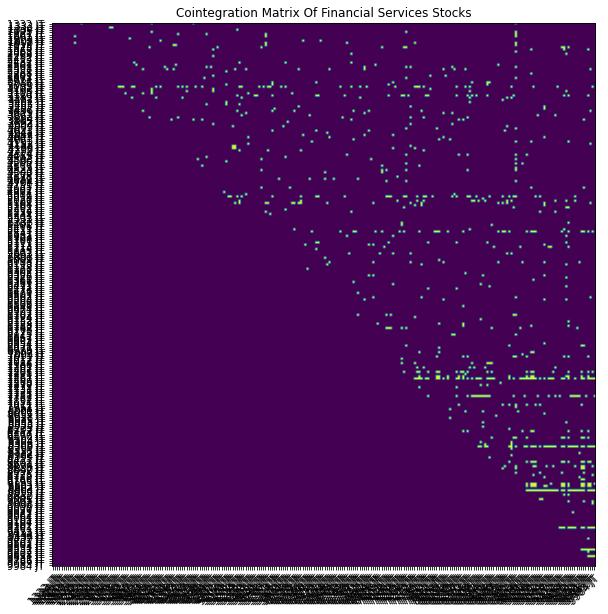

[('1332 JT', '2002 JT'), ('1332 JT', '3893 JT'), ('1332 JT', '4507 JT'), ('1332 JT', '8802 JT'), ('1334 JT', '2914 JT'), ('1334 JT', '3086 JT'), ('1605 JT', '5202 JT'), ('1721 JT', '3893 JT'), ('1721 JT', '7261 JT'), ('1721 JT', '8802 JT'), ('1801 JT', '4208 JT'), ('1801 JT', '4631 JT'), ('1801 JT', '5703 JT'), ('1801 JT', '8802 JT'), ('1802 JT', '1925 JT'), ('1802 JT', '5703 JT'), ('1802 JT', '8802 JT'), ('1803 JT', '3401 JT'), ('1808 JT', '4041 JT'), ('1808 JT', '6305 JT'), ('1808 JT', '6479 JT'), ('1812 JT', '1925 JT'), ('1812 JT', '5703 JT'), ('1812 JT', '6724 JT'), ('1812 JT', '7272 JT'), ('1812 JT', '8802 JT'), ('1925 JT', '4183 JT'), ('1925 JT', '4188 JT'), ('1925 JT', '5703 JT'), ('1925 JT', '8802 JT'), ('1928 JT', '3865 JT'), ('1928 JT', '4901 JT'), ('1928 JT', '5541 JT'), ('1928 JT', '7003 JT'), ('1928 JT', '7211 JT'), ('1928 JT', '7261 JT'), ('1928 JT', '9432 JT'), ('1928 JT', '9433 JT'), ('1928 JT', '9437 JT'), ('1963 JT', '4751 JT'), ('1963 JT', '9007 JT'), ('1963 JT', '94

In [12]:
fig, ax = plt.subplots(figsize=(25, 10))
im = ax.imshow(pvalues <= .02)

ax.set_xticks(np.arange(len(Tickers)))
ax.set_yticks(np.arange(len(Tickers)))

ax.set_xticklabels(Tickers)
ax.set_yticklabels(Tickers)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Cointegration Matrix Of Financial Services Stocks")
plt.show()
print(pairs)

## Mean-reversion Verification

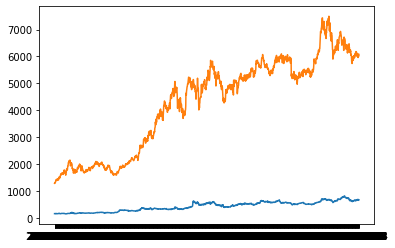

In [38]:
# checking feasible pairs
fig = plt.figure()
plt.plot(train_set['1332 JT'])
plt.plot(train_set['4507 JT'])
plt.show()

In [137]:
# checking feasible pairs
df_volume=dframe.groupby("ticker")["volume"].mean().reset_index()
print(df_volume[df_volume['ticker']=='1332 JT'])
print(df_volume[df_volume['ticker']=='4507 JT'])

    ticker        volume
0  1332 JT  2.853706e+06
     ticker        volume
64  4507 JT  1.409848e+06


In [138]:
# checking if the spread is mean-reverting
Asset_1 = train_set['1332 JT']
Asset_2 =  train_set['4507 JT']

Asset_1  = add_constant(Asset_1)
results = OLS(Asset_2, Asset_1).fit()

coef = results.params['1332 JT']
Asset_1 = Asset_1['1332 JT']

spread = Asset_2 - (coef * Asset_1)

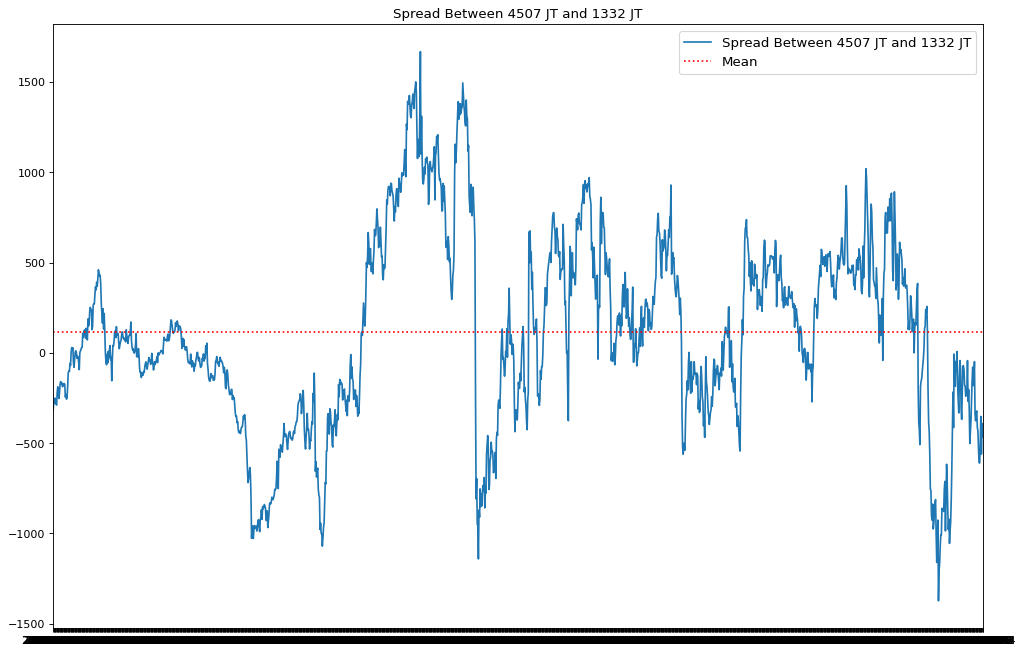

In [139]:
# plot the spread
plt.figure(figsize=(15,10), dpi=80)
plt.plot(spread)
plt.xlim('2013-01-04', '2019-07-24')
plt.axhline(spread.mean(), color='red', linestyle=':')
plt.legend(['Spread Between 4507 JT and 1332 JT', 'Mean'], prop={'size': 12});
plt.title("Spread Between 4507 JT and 1332 JT")
plt.show()

In [140]:
# calculated the price ratio to see if it is still mean-reverting.
price_ratio = Asset_1/Asset_2

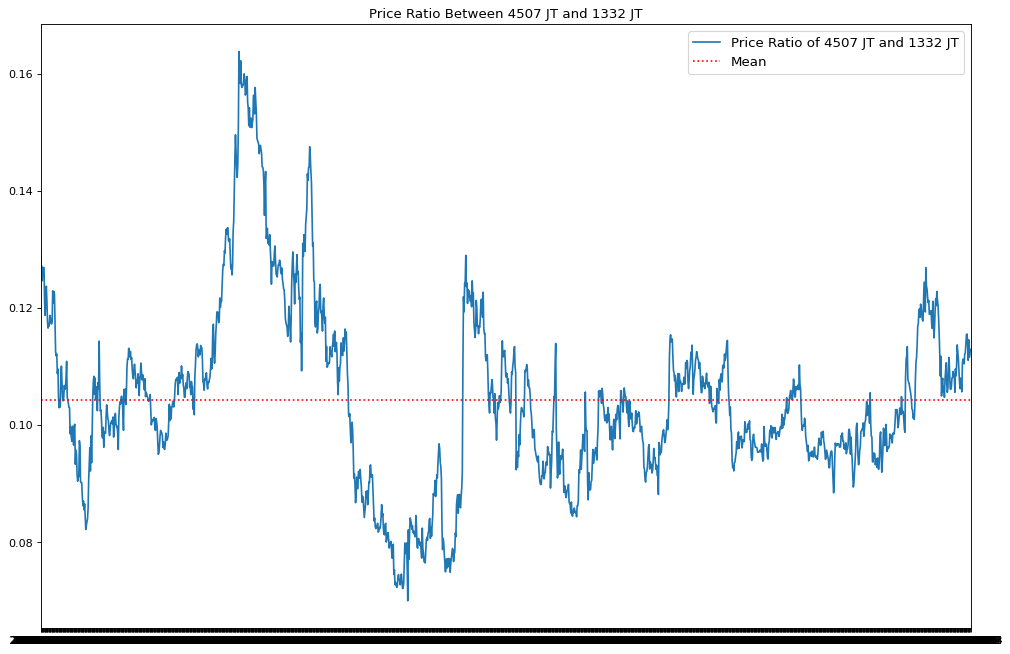

In [142]:
plt.figure(figsize=(15,10), dpi=80)
plt.plot(price_ratio)
plt.xlim('2013-01-04', '2019-07-24') # timeline of training dataset for this pair
plt.axhline(price_ratio.mean(), color='red', linestyle=':')
plt.legend(['Price Ratio of 4507 JT and 1332 JT', 'Mean'], prop={'size': 12});
plt.title("Price Ratio Between 4507 JT and 1332 JT")
plt.show()

In [143]:
# Augmented Dickey Fuller Test
price_ratio_pvalue = round(adfuller(price_ratio)[1],5)
spread_pvalue = round(adfuller(spread)[1],5)

(price_ratio_pvalue, spread_pvalue)

(0.01209, 0.00174)

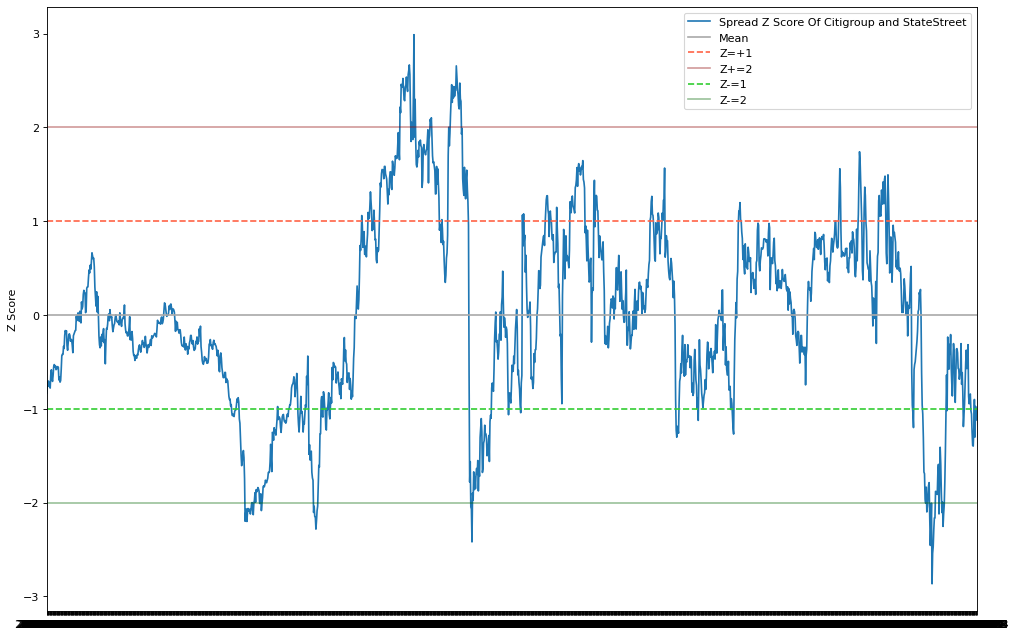

In [146]:
# Z score = (value - mean) / standard deviation
spread_z_score = (spread - spread.mean()) / np.std(spread)

plt.figure(figsize=(15,10), dpi=80)
plt.plot(spread_z_score)
plt.axhline(spread_z_score.mean(), color = 'darkgrey' )
plt.axhline(1, color='tomato', linestyle='dashed')
plt.axhline(2, color='darkred', alpha = .4)
plt.axhline(-1, color='limegreen', linestyle='dashed')
plt.axhline(-2, color='darkgreen', alpha = .4)

plt.xlim('2013-01-04', '2019-07-24') # timeline of training dataset for this pair
plt.legend(['Spread Z Score Of Citigroup and StateStreet', 'Mean', 'Z=+1', 'Z+=2', 'Z-=1', 'Z-=2' ]);
plt.ylabel('Z Score')

plt.show()

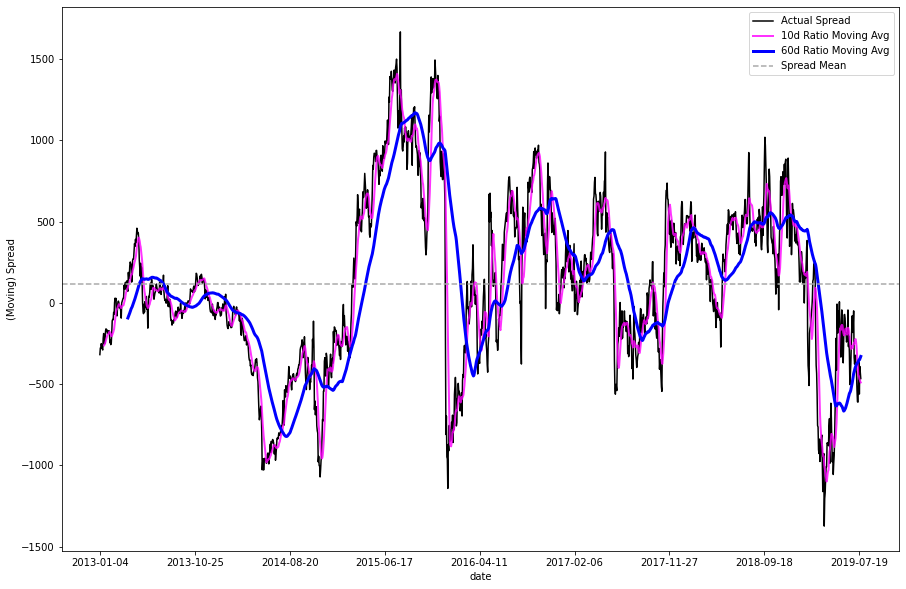

In [148]:
# Given that this trading strategy is primarily based on mean reversion, use moving averages to construct trading signals
spread_10D_MAVG = spread.rolling(window=10).mean() 
spread_60D_MAVG = spread.rolling(window=60).mean() 

plt.figure(figsize=(15, 10))
spread.plot(color = 'black')
spread_10D_MAVG.plot(color = 'magenta', linewidth=2, alpha = .8)
spread_60D_MAVG.plot(color = 'b', linewidth=3)
plt.axhline(spread.mean(), color = 'darkgrey', linestyle = 'dashed' )
plt.legend(['Actual Spread', '10d Ratio Moving Avg', '60d Ratio Moving Avg', 'Spread Mean'])
plt.ylabel('(Moving) Spread')
plt.show()

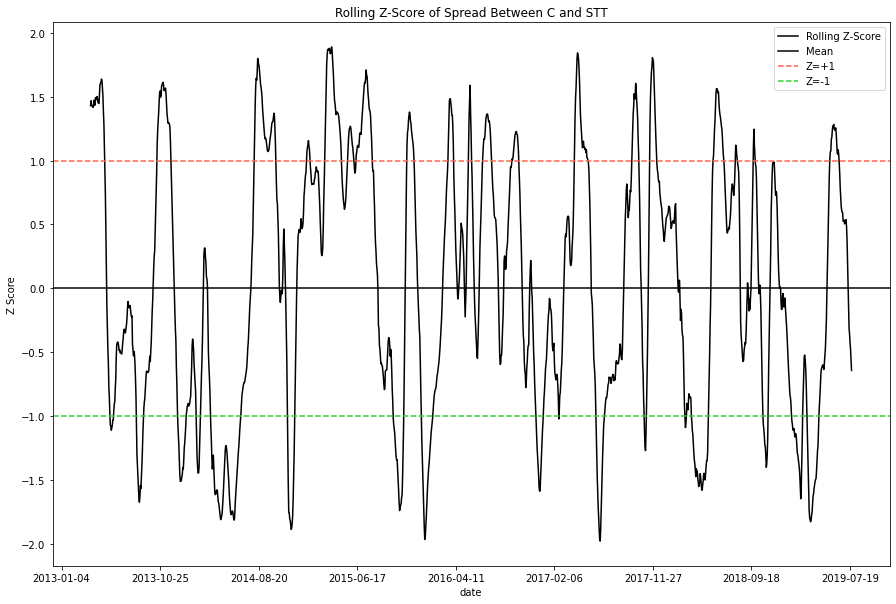

In [149]:
STD_60 = spread.rolling(window=60).std()
Rolling_Z_Score = ((spread_10D_MAVG - spread_60D_MAVG)/STD_60)
Rolling_Z_Score.plot(figsize=(15,10), color = 'black')

#plt.xlim('2013-01-01', '2018-01-01')
plt.axhline(0, color='black')
plt.axhline(1, color='tomato', linestyle='dashed')
plt.axhline(-1, color='limegreen', linestyle='dashed')
plt.legend(['Rolling Z-Score', 'Mean', 'Z=+1', 'Z=-1'])
plt.title("Rolling Z-Score of Spread Between C and STT")
plt.ylabel('Z Score')
plt.show()

## Trading Strategy Simulation

In [169]:
def trading_simulation(Asset1, Asset2, window1, window2, asset1_name, asset2_name):
    leverage=100000  # By assumption, could be changed as it is an aribitrage position
    Asset_1 = Asset1
    Asset_2 = Asset2

    Asset_1  = add_constant(Asset_1)
    results = OLS(Asset_2, Asset_1).fit()

    coef = results.params[asset1_name]
    Asset_1 = Asset_1[asset1_name]

    spread = -Asset_2 + (coef * Asset_1)

    moving_average1 = spread.rolling(window=window1).mean()
    moving_average2 = spread.rolling(window=window2).mean()
    std = spread.rolling(window=window2).std()
    
    z_score = ((moving_average1-moving_average2)/std)
    # calculating the z score with moving averages as shown in previous sections
    
    profit, profit_high, profit_low = 0,0,0
    profit_high_lis=[]
    profit_low_lis=[]
    ratio_high_sell, ratio_high_buy, ratio_low_buy, ratio_low_sell = 0, 0, 0, 0
    low_trade_total, high_trade_total, = 0,0
    count_high, count_low = 0,0
    old_profit_high, old_profit_low = 0,0
    high_hit_rate, low_hit_rate = [], []
    low_dic, high_dic = {}, {}
    Asset1_shares, Asset2_shares = 0,0
    open_trade = 0
    
    for i in range(len(spread)):
        
        if z_score[i] > 1.25 and open_trade == 0: 
        #if the spread z score is high we will 'sell' the ratio --short Asset 1 and long Asset 2
        
            #calculating the maximum number of shares for each stock; positions are weighted equally
            Asset1_shares = (leverage // 2) // Asset1[i]
            Asset2_shares = (leverage // 2) // Asset2[i]
            
            #selling the ratio means you sell the higher stock (STT) and buy the lower stock (C)
            ratio_high_sell = Asset1[i] * Asset1_shares
            ratio_high_buy = Asset2[i] * Asset2_shares
            
            #tracking the number of trades for profit calculation and overall frequency
            count_high += 1
            high_trade_total +=1
            #checker count high with tracker
            open_trade = 1

##############################################################################################################################            
        elif z_score[i] < -1.25 and open_trade == 0:
        #if the spread z score is low we will 'buy' the ratio 
        
            #calculating the maximum number of shares for each stock; positions are weighted equally
            Asset1_shares = (leverage // 2) // Asset1[i]
            Asset2_shares = (leverage // 2) // Asset2[i]
            
            #'Buying' the ratio means you buy the higher stock (STT) and sell the lower stock (C)
            ratio_low_buy = Asset1[i] * Asset1_shares
            ratio_low_sell = Asset2[i] * Asset2_shares
            
            count_low += 1
            low_trade_total +=1
            open_trade = 1

##############################################################################################################################                 
        if open_trade == 1 and (abs(z_score[i]) < .5):
        #once the z score has returned to normal range, we will close the positions
            
            #tracking the previous profit level so that we can calculate changes
            old_profit_high = profit_high
            old_profit_low = profit_low
            
            cur_profit_high=ratio_high_sell - (Asset1[i] * Asset1_shares * count_high)+ (Asset2[i]*Asset2_shares*count_high) - ratio_high_buy
            profit_high+=cur_profit_high   
            profit_high_lis.append(cur_profit_high)   
            # profit_high += ratio_high_sell - (Asset1[i] * Asset1_shares * count_high)
            # profit_high += (Asset2[i]*Asset2_shares*count_high) - ratio_high_buy
            # profit is derived from (shorted share price - current price) + (current share price - initial long share price)
            
            if (profit_high-old_profit_high) != 0:
            #tracking profit from high trades for metrics
                high_hit_rate.append(profit_high-old_profit_high)
                # high_dic[Asset1.index[i].strftime('%Y-%m-%d')] = (profit_high-old_profit_high)
                high_dic[Asset1.index[i]] = (profit_high-old_profit_high)
            
            cur_profit_low=(Asset1[i]*Asset1_shares*count_low) - ratio_low_buy + ratio_low_sell - (Asset2[i]*Asset2_shares*count_low)
            profit_low+=cur_profit_low
            profit_low_lis.append(cur_profit_low)
            # profit_low += (Asset1[i]*Asset1_shares*count_low) - ratio_low_buy
            # profit_low += ratio_low_sell - (Asset2[i]*Asset2_shares*count_low)
                
            if (profit_low-old_profit_low) != 0:
            #tracking profit from low trades for metrics
                low_hit_rate.append(profit_low-old_profit_low)
                # low_dic[Asset1.index[i].strftime('%Y-%m-%d')] = (profit_low-old_profit_low)
                low_dic[Asset1.index[i]] = (profit_low-old_profit_low)
            
            #clearing all positions
            ratio_high_sell, ratio_high_buy, ratio_low_buy, ratio_low_sell = 0, 0, 0, 0
            count_high,count_low = 0,0
            open_trade = 0
            
            
    profit = profit_low + profit_high
    
    high_biggest_loss = min(high_hit_rate)
    high_biggest_gain = max(high_hit_rate)
    
    low_biggest_loss = min(low_hit_rate)
    low_biggest_gain = max(low_hit_rate)
    
    
    high_hit_rate = (len([x for x in high_hit_rate if x > 0]) / len(high_hit_rate)) * 100
    low_hit_rate = (len([x for x in low_hit_rate if x > 0]) / len(low_hit_rate)) * 100
    
    print("The total profit between {} and {} was ${:.2f}".format(Asset1.index[0], Asset1.index[len(Asset1)-1], profit ))
    
    print("{} trades where the price ratio was high were executed; they were profitable {:.2f}% of the time, with a largest single gain of ${:.2f}, and a largest single loss of ${:.2f}"
           .format(high_trade_total, high_hit_rate, high_biggest_gain, high_biggest_loss))
    print("{} trades where the price ratio was low were executed they were profitable {:.2f}% of the time, with a largest single gain of ${:.2f}, and a largest single loss of ${:.2f}"
           .format(low_trade_total, low_hit_rate, low_biggest_gain, low_biggest_loss))
        
    trades_dic = {**high_dic, **low_dic}
    #trades_dic = sorted(trades_dic.keys())
    total = leverage
    tracker = []
    for key, value in sorted(trades_dic.items()):
        total += trades_dic[key]
        tracker.append(total)
        
    growth_tracker = pd.DataFrame({'Date': sorted(list(trades_dic.keys())), 'Cumulative Value': tracker})
    growth_tracker = growth_tracker.set_index('Date')
    return  ("High Trades", high_dic), ("Low Trades", low_dic), growth_tracker, ("Total Profit:", profit)
    

## Backtesting

### Test the results in-sample

In [170]:
trading_simulation(train_set['1332 JT'], train_set['4507 JT'], 10, 60, '1332 JT', '4507 JT')

The total profit between 2013-01-04 and 2019-07-24 was $52374.73
13 trades where the price ratio was high were executed; they were profitable 92.31% of the time, with a largest single gain of $8008.77, and a largest single loss of $-14114.88
13 trades where the price ratio was low were executed they were profitable 84.62% of the time, with a largest single gain of $7358.90, and a largest single loss of $-9945.62


(('High Trades',
  {'2013-09-30': 2884.188699999999,
   '2014-02-04': 3026.058499999999,
   '2014-03-06': 1417.2298999999912,
   '2014-07-18': -14114.879599999993,
   '2014-12-11': 8008.773000000008,
   '2015-11-06': 7091.946699999993,
   '2016-02-24': 5181.338399999993,
   '2017-01-16': 4115.302199999991,
   '2017-08-18': 1883.5415999999968,
   '2017-11-09': 2677.2980000000025,
   '2018-05-21': 602.7728999999963,
   '2018-11-09': 2593.4072000000015,
   '2019-05-09': 68.85310000000754}),
 ('Low Trades',
  {'2013-05-20': 3079.616600000023,
   '2013-12-03': 987.4843999999866,
   '2014-10-20': -2714.6790000000037,
   '2015-08-07': -9945.624500000005,
   '2015-12-10': 6613.5725999999995,
   '2016-04-08': 7358.8982999999935,
   '2016-06-03': 4602.2720000000045,
   '2016-08-10': 3747.1449000000066,
   '2017-05-24': 4678.677000000018,
   '2017-10-18': 3202.5351999999984,
   '2017-12-25': 3304.62720000001,
   '2018-07-06': 1107.846000000005,
   '2019-07-09': 916.5251999999964}),
             C

In [171]:
# compare to other random combination
trading_simulation(train_set['1332 JT'], train_set['1605 JT'], 10, 60, '1332 JT','1605 JT')

The total profit between 2013-01-04 and 2019-07-24 was $-15764.45
13 trades where the price ratio was high were executed; they were profitable 30.77% of the time, with a largest single gain of $6161.47, and a largest single loss of $-14995.83
9 trades where the price ratio was low were executed they were profitable 44.44% of the time, with a largest single gain of $20643.33, and a largest single loss of $-13578.14


(('High Trades',
  {'2013-07-11': -3942.6626000000033,
   '2014-09-26': 3171.7422000000006,
   '2014-11-21': -14995.829000000012,
   '2014-12-26': 6161.465799999991,
   '2015-10-14': -8363.126099999994,
   '2016-04-22': -2523.3615000000063,
   '2016-07-28': 5402.621700000003,
   '2017-05-12': 1592.529899999994,
   '2017-06-19': -7060.512900000009,
   '2018-04-06': -118.58700000000681,
   '2018-07-31': -149.46789999998873,
   '2019-02-13': -5778.025800000003,
   '2019-06-28': -2202.8824000000095}),
 ('Low Trades',
  {'2014-02-03': -4067.124899999988,
   '2014-07-15': 20643.329099999995,
   '2015-03-19': -730.6662999999899,
   '2015-06-19': -970.2679000000062,
   '2017-01-18': 3070.1152,
   '2017-08-14': -269.38230000001204,
   '2018-02-08': -13578.138399999996,
   '2018-05-24': 746.2849999999962,
   '2018-11-01': 8197.492000000006}),
             Cumulative Value
 Date                        
 2013-07-11        96057.3374
 2014-02-03        91990.2125
 2014-07-15       112633.5416
 2014

### Test the results out of sample

In [172]:
trading_simulation(test_set['1332 JT'], test_set['4507 JT'], 10, 60, '1332 JT', '4507 JT')

The total profit between 2019-07-25 and 2021-03-19 was $-2327.63
3 trades where the price ratio was high were executed; they were profitable 100.00% of the time, with a largest single gain of $976.01, and a largest single loss of $955.16
2 trades where the price ratio was low were executed they were profitable 0.00% of the time, with a largest single gain of $-1276.46, and a largest single loss of $-2982.34


(('High Trades',
  {'2020-04-14': 955.1613999999972, '2020-11-12': 976.0106000000014}),
 ('Low Trades',
  {'2020-02-05': -1276.4616000000024, '2020-07-15': -2982.341800000002}),
             Cumulative Value
 Date                        
 2020-02-05        98723.5384
 2020-04-14        99678.6998
 2020-07-15        96696.3580
 2020-11-12        97672.3686,
 ('Total Profit:', -2327.6314000000057))

In [173]:
# compare to other random combination
trading_simulation(train_set['1332 JT'], train_set['1605 JT'], 10, 60, '1332 JT','1605 JT')

The total profit between 2013-01-04 and 2019-07-24 was $-15764.45
13 trades where the price ratio was high were executed; they were profitable 30.77% of the time, with a largest single gain of $6161.47, and a largest single loss of $-14995.83
9 trades where the price ratio was low were executed they were profitable 44.44% of the time, with a largest single gain of $20643.33, and a largest single loss of $-13578.14


(('High Trades',
  {'2013-07-11': -3942.6626000000033,
   '2014-09-26': 3171.7422000000006,
   '2014-11-21': -14995.829000000012,
   '2014-12-26': 6161.465799999991,
   '2015-10-14': -8363.126099999994,
   '2016-04-22': -2523.3615000000063,
   '2016-07-28': 5402.621700000003,
   '2017-05-12': 1592.529899999994,
   '2017-06-19': -7060.512900000009,
   '2018-04-06': -118.58700000000681,
   '2018-07-31': -149.46789999998873,
   '2019-02-13': -5778.025800000003,
   '2019-06-28': -2202.8824000000095}),
 ('Low Trades',
  {'2014-02-03': -4067.124899999988,
   '2014-07-15': 20643.329099999995,
   '2015-03-19': -730.6662999999899,
   '2015-06-19': -970.2679000000062,
   '2017-01-18': 3070.1152,
   '2017-08-14': -269.38230000001204,
   '2018-02-08': -13578.138399999996,
   '2018-05-24': 746.2849999999962,
   '2018-11-01': 8197.492000000006}),
             Cumulative Value
 Date                        
 2013-07-11        96057.3374
 2014-02-03        91990.2125
 2014-07-15       112633.5416
 2014